# Activity M5: Exploring Neural Networks with MNIST

Welcome to Activity M5! In this activity, we will dive into the fascinating world of neural networks, using them to solve a classic problem in machine learning: digit recognition. Our primary tool will be the MNIST dataset, a collection of handwritten digits widely used for training and testing in the field of machine learning.

The purpose of this activity is twofold:
1. **Understanding Neural Networks**: We'll explore the basic components and functioning of neural networks, including layers, neurons, and activation functions. This will be a hands-on experience to understand how neural networks can learn from data.
2. **Practical Application and Experimentation**: You'll get to apply your understanding by experimenting with different hyperparameters of a simple neural network model. The challenge is to improve the model's accuracy on digit recognition while making minimal and thoughtful changes to the hyperparameters.

By the end of this activity, you should have a foundational understanding of how neural networks work and how their performance can be influenced by different hyperparameters. This is a crucial step in your journey into the world of artificial intelligence.

Let's get started!


## MNIST Dataset Overview

### What is the MNIST Dataset?

The MNIST (Modified National Institute of Standards and Technology) dataset is a large collection of handwritten digits commonly used for training various image processing systems. It's widely used in the field of machine learning and computer vision for benchmarking classification algorithms.

### Dataset Specifications

- **Content**: The dataset contains 70,000 images of handwritten digits (0 through 9).
- **Image Size**: Each image is 28x28 pixels, represented in a grayscale format.
- **Split**: Typically, the dataset is split into 60,000 training images and 10,000 testing images, allowing for robust training and evaluation of models.

### Historical Background
[Here](https://en.wikipedia.org/wiki/MNIST_database) is the wikipage of MNIST dataset please go through it.


We will be using popular deep learning framework tensorflow to complete this activity. First let's load the dataset from tensorflow.keras.datasets and display some instances from the dataset.

11490434/11490434 [==============================] - 2s 0us/step


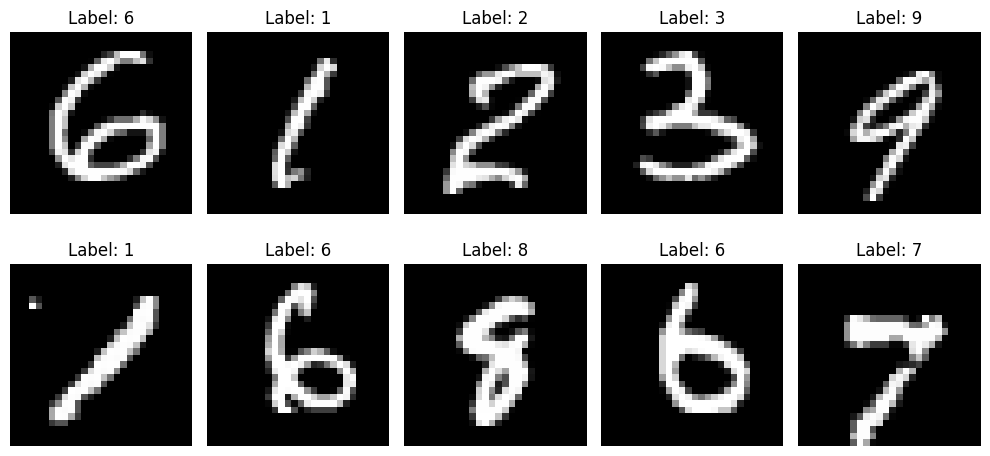

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to display a grid of images
def display_images(images, labels, num_rows=2, num_cols=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select random images to display
num_images = 10
random_indices = np.random.choice(range(len(x_train)), num_images, replace=False)
selected_images = x_train[random_indices]
selected_labels = y_train[random_indices]

# Display the images
display_images(selected_images, selected_labels)


# Understanding Neural Networks

Neural networks are a cornerstone of modern artificial intelligence, particularly in the field of deep learning. They are inspired by the structure and function of the human brain, especially in how neurons process and transmit information.

## What is a Neural Network?

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In essence, it is a system of interconnected units (neurons) that work together to process and analyze data.

## How Do Neural Networks Work?

Neural networks operate on layers of neurons. Each neuron in a layer is connected to neurons in the previous and next layers. These connections have associated weights and biases, which are adjusted during the training process.

<img src="https://miro.medium.com/v2/resize:fit:1400/0*_SH7tsNDTkGXWtZb.png" width="500" height="300">



- **Input Layer**: This is where the network receives its input data.
- **Hidden Layers**: These layers perform computations using activated weights and are the main computational engine of the neural network.
- **Output Layer**: The final layer that outputs the prediction or classification.

The process of a neural network can be summarized in three key steps:
1. **Feedforward**: Input data is passed through the layers of the network. Each neuron applies a weighted sum on the inputs, adds a bias, and then passes it through an activation function.
2. **Backpropagation**: The network compares the output it produced with the actual desired output and calculates the error.
3. **Weight Adjustment**: Using algorithms like Gradient Descent, the network adjusts its weights and biases to minimize the error.

Mathematically, the operation in each neuron can be represented as:

$$
y = f(\sum_{i}(w_i \cdot x_i) + b)
$$

Where:

- $y$ is the output.\\
- $f$ is the activation function.
- $w_i$ are the weights.
- $x_i$ are the inputs.
- $b$ is the bias.

## Learning Resources

To gain a deeper understanding of neural networks, I highly recommend watching this excellent video by [3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk) on YouTube. It provides a clear and intuitive explanation of how neural networks function.

[![Neural Networks Video](https://img.youtube.com/vi/aircAruvnKk/0.jpg)](https://www.youtube.com/watch?v=aircAruvnKk)

Additionally, for an interactive learning experience, check out the [3Blue1Brown Neural Network Visualization](https://www.3blue1brown.com/lessons/neural-networks). This interactive blog allows you to draw digits and see how a neural network processes your input in real-time, offering a unique perspective on how neural networks make predictions.




# Understanding Neural Network Hyperparameters

In neural networks, hyperparameters are the parameters whose values are set before the learning process begins. These parameters have a significant impact on the training of the network and the final results. Let's discuss some of the essential hyperparameters:

## Number of Layers

- **Input Layer**: The first layer that receives the input data. Its size is determined by the dimensions of the input data.
- **Hidden Layers**: Layers between the input and output layers. The number of hidden layers and their size (number of neurons) can greatly affect the network's ability to capture complex patterns.
- **Output Layer**: The final layer that produces the output. Its size is determined by the number of output classes or values.

## Number of Neurons in a Layer

- The number of neurons in a layer represents the layer's capacity to learn various aspects of the data. More neurons can increase the network's complexity and computational cost.

## Activation Functions

Activation functions introduce non-linear properties to the network, allowing it to learn more complex data patterns.

- **ReLU (Rectified Linear Unit)**: Commonly used in hidden layers, ReLU is defined as $f(x) = max(0, x)$. It helps with faster training and mitigating the vanishing gradient problem. Also calculating the gradient of ReLU function is simpler. It is 1 for values of x greater than 0 and 0 otherwise.

  <img src="https://miro.medium.com/v2/resize:fit:1384/1*_vvB81JFM1PGZvYeVI52XQ.png" width="500" height="300">

- **Sigmoid**: Often used in the output layer for binary classification, it squashes the output between 0 and 1, defined as $f(x) = \frac{1}{1 + e^{-x}}$. It's useful for models where we need to predict the probability as an output.

  <img src="https://miro.medium.com/v2/resize:fit:970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width="500" height="300">

- **Softmax**: The Softmax function is often used in the output layer of a neural network for multi-class classification problems. It is simply the extension of sigmoid function into multiclass problems. It converts the output scores from the network into probability values for each class. The function is defined as:

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

where $x_i$ is the score (also known as the logit) for class i  and the denominator is the sum of exponential scores for all classes. This function ensures that the output probabilities sum up to 1, making it a suitable choice for probabilistic interpretation in classification tasks.


## Learning Rate

- The learning rate defines how quickly or slowly a neural network updates its parameters during training. A too high learning rate can cause the model to converge too quickly to a suboptimal solution, while a too low learning rate can make the training process unnecessarily long.

Understanding and tuning these hyperparameters is crucial for training effective neural networks. Different types of problems may require different configurations for optimal performance.



## Neural Network Training on the MNIST Dataset

### Overview
In this exercise, we start with a neural network model that is initially configured to perform suboptimally on the MNIST digit classification task. This setup serves as a practical exercise in understanding and optimizing neural network hyperparameters for image recognition and machine learning.

### Data Preparation
The MNIST dataset, consisting of grayscale images of handwritten digits (0-9), is loaded and split into training and test sets. Each image, originally in a 28x28 pixel format, is normalized to ensure pixel values are in the range [0, 1]. This normalization is crucial for consistent input value scales, aiding in the training process.

### Initial Neural Network Architecture
- The initial model is a sequential feedforward neural network with two hidden layers.
- **Input Layer**: A flattening layer that transforms each 28x28 image into a 1D array of 784 features.
- **Hidden Layers**: Two dense layers, but with configurations that are not optimal for learning the complex patterns in the data effectively.
- **Output Layer**: A final dense layer designed for multi-class classification but may not be optimized for best performance.

### Training Process
- The model is compiled with an optimizer and loss function, but the initial settings might not be ideal for this specific task.
- Training is conducted over several epochs, and the model's performance on the test set is evaluated at the end of each epoch. However, the initial training might not yield high accuracy due to suboptimal hyperparameter settings.



# A crash course on tensorflow

In TensorFlow, defining and compiling a neural network involves several key steps. Each step allows you to specify certain hyperparameters that control the network's architecture and learning process.

## Defining the Neural Network

### 1. Model Architecture
- **Sequential Model**: In TensorFlow, a common way to build a neural network is by using the `Sequential` model from `tensorflow.keras`. This model allows layers to be added in sequence.
  ```python
  from tensorflow.keras.models import Sequential
  model = Sequential()
  ```
- **Layers**: The layers are added to the model using the `.add()` method. Each layer can have its own hyperparameters.
  - **Dense Layer**: A fully connected layer where each neuron receives input from all neurons of the previous layer.
    ```python
    from tensorflow.keras.layers import Dense
    model.add(Dense(units=64, activation='relu'))
    ```
    - `units`: Number of neurons in the layer.
    - `activation`: The activation function for the layer.

### 2. Input Layer
- The first layer of the network needs to know the input shape, so the `input_shape` argument is often specified in the first layer.
  ```python
  model.add(Dense(64, activation='relu', input_shape=(input_dimension,)))
  ```

## Compiling the Neural Network

After defining the model architecture, the next step is to compile the model. This step involves specifying the optimizer, loss function, and metrics for evaluation.

### 1. Optimizer
- The optimizer is an algorithm or method used to change the attributes of the neural network such as weights and learning rate. It helps in minimizing the loss function.
  ```python
  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001))
  ```

### 2. Loss Function
- The loss function measures how well the model is performing. A common choice for classification tasks is the categorical cross-entropy.
  ```python
  model.compile(loss='sparse_categorical_crossentropy')
  ```

### 3. Metrics
- Metrics are used to evaluate the performance of your model. Accuracy is a common metric.
  ```python
  model.compile(metrics=['accuracy'])
  ```

### Full Compilation Example
- Here's how the model is typically compiled with all three components:
  ```python
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  ```

This setup forms the basis of most neural network models in TensorFlow, and understanding these components is crucial for effective model training and evaluation.


# Activity Objective

In this activity, you are presented with a neural network that has been intentionally configured to perform poorly on the MNIST digit classification task. Your objective is to modify the hyperparameters of this network to significantly improve its accuracy.

## Your Task

1. **Analyze the Current Model**: Understand the current structure and configuration of the neural network. Identify potential reasons for its low performance.

2. **Modify Hyperparameters**: Adjust the hyperparameters of the model. This includes but is not limited to:
   - The number of neurons in each layer.
   - The activation functions used in each layer.
   - The learning rate for the training process.
   - The number of layers in the network.

3. **Achieve Higher Accuracy**: Your goal is to achieve an accuracy of over 95% on the MNIST test dataset. However, your changes should be thoughtful and minimal. Avoid extreme solutions like excessively large networks that do not align with the complexity of the task.

4. **Reflect on the Results**: After improving the model, reflect on:
   - Why the initial model performed poorly.
   - How your changes improved the model's performance.
   - Any additional insights you gained about neural network optimization.
5. **Upload the ipynb File to Gradescope**: Once you have completed the activity and made your changes and run the model to achieve accuracy over 95%, upload your Jupyter Notebook (ipynb file) to Gradescope for grading. Ensure that your notebook is well-organized.Make sure to save and upload the final version of your notebook that includes the trained model and your analysis.


## Guidelines

- **Balance Complexity and Performance**: Aim for a model that is as simple as possible while still achieving high accuracy.
- **Experimentation**: Feel free to experiment with different combinations of hyperparameters. However, ensure that each change is justified and contributes to your understanding of neural network behavior.
- **Understanding Over Memorization**: Focus on understanding the impact of each hyperparameter on the model's learning and generalization capabilities rather than trial-and-error.

Good luck, and enjoy the process of tuning and learning from your neural network model!


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to the 0-1 range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),             # Flatten the 28x28 images to 1D array of 784 features
    Dense(1000, activation='relu'),            #used relu to test if capuring non-linearities helps increasing accuracy and reducing loss
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')            # Output layer with 10 neurons (one per class) and softmax activation
])

# Compile the model with a learning rate and loss function
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Function to print training and test accuracy after every epoch
class AccuracyHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs['accuracy']
        test_acc = self.model.evaluate(x_test, y_test, verbose=0)[1]
        print(f'Epoch {epoch+1}: Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Create an instance of the accuracy history class
accuracy_history = AccuracyHistory()

# Train the model
model.fit(x_train, y_train,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=[accuracy_history])


Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2193 - accuracy: 0.9350 - val_loss: 0.1078 - val_accuracy: 0.9666
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.0867 - val_accuracy: 0.9748
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0889 - val_accuracy: 0.9751
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0834 - val_accuracy: 0.9772
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0978 - val_accuracy: 0.9742
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0823 - val_accuracy: 0.9777
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.0839 - val_accuracy: